## Final Report
#### Members: Meghan Ue Yan Lam, Chi Wu

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')

df.info()
#from the data summmary below, there're 20k transaction data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [3]:
df.head(10)

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
5,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,2024-05-26,Standard,"Impulse Item,Accessory",65.78
6,1005,25,Female,No,Smartwatch,SKU1003,3,Completed,Paypal,7603.47,844.83,9,2024-01-30,Overnight,NaN,0.00
7,1005,25,Female,No,Laptop,SKU1005,3,Completed,Debit Card,4175.64,463.96,9,2024-06-24,Overnight,"Extended Warranty,Extended Warranty",75.33
8,1006,24,Male,No,Smartphone,SKU1004,2,Cancelled,Debit Card,5538.33,791.19,7,2023-10-03,Standard,Impulse Item,43.05
9,1006,24,Male,Yes,Laptop,SKU1005,3,Completed,Cash,4175.64,463.96,9,2024-01-01,Express,NaN,0.00


## Data Cleaning

In [4]:
#checking if there're any duplicates
dup=df.duplicated()
print(f"The number of duplicated rows: {dup.sum()}")

#checking the number of missing values
na=df.isnull()
print(f"\nThe number of missing values in the dataframe:\n{na.sum()}")

#as from the above results, as there's only one missing value from gender variable, we can drop that one data point 
df = df.dropna(subset=['Gender'])
na2=df.isnull()

#for the Add-Ons Purchased column, due to the large number of missing values, we'll be filling the missing values with "None" to indicate no add-ons purchased
df['Add-ons Purchased'] = df['Add-ons Purchased'].fillna('None')


The number of duplicated rows: 0

The number of missing values in the dataframe:
Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64


In [5]:
print(f"\nNumber of missing values after dropna and fillna:\n{df.isnull().sum()}")
print(f'\nCurrent number of sales data: {len(df)}')
#We have 19999 number of sales data now.


Number of missing values after dropna and fillna:
Customer ID          0
Age                  0
Gender               0
Loyalty Member       0
Product Type         0
SKU                  0
Rating               0
Order Status         0
Payment Method       0
Total Price          0
Unit Price           0
Quantity             0
Purchase Date        0
Shipping Type        0
Add-ons Purchased    0
Add-on Total         0
dtype: int64

Current number of sales data: 19999


In [6]:
#ensure 'Purchase Date' is in datetime format for us to conduct time series analysis or sorting
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
print(df['Purchase Date'].dtype)

datetime64[ns]


## Exploratory Data Analysis - Customer Demographic and Type

#### To have a better understanding of the customer portfolio 

In [7]:
#first, trying to ensure unique customer info are extracted for customer analysis
unique=df['Customer ID'].nunique()
print(f'\nThe data has 19999 sales data from {unique} unique customers.')

#create a dataframe with only unique customer info with the other customer related information
#drop duplicates based on 'CustomerID' and select the desired customer info columns
unique_customer_info = df.drop_duplicates(subset='Customer ID')[['Customer ID', 'Age', 'Gender', 'Loyalty Member']]



The data has 19999 sales data from 12135 unique customers.



Customer distribution by gender:
Gender
Male      6197
Female    5938
Name: count, dtype: int64


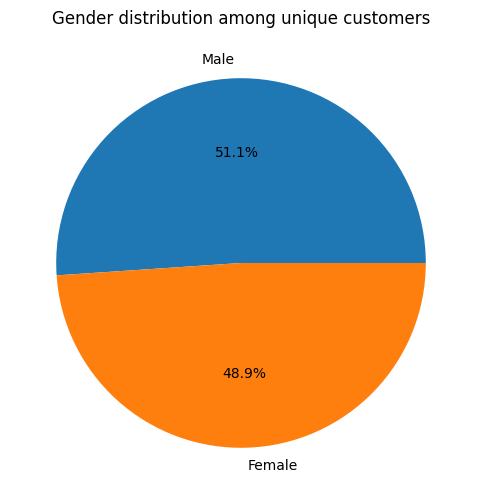

In [8]:
#Gender distribution among unique customers
sex=unique_customer_info['Gender'].value_counts()
print(f'\nCustomer distribution by gender:\n{sex}')

plt.figure(figsize=(8, 6))
plt.pie(sex, labels=sex.index, autopct='%1.1f%%')
plt.title('Gender distribution among unique customers')
plt.show()



18
80


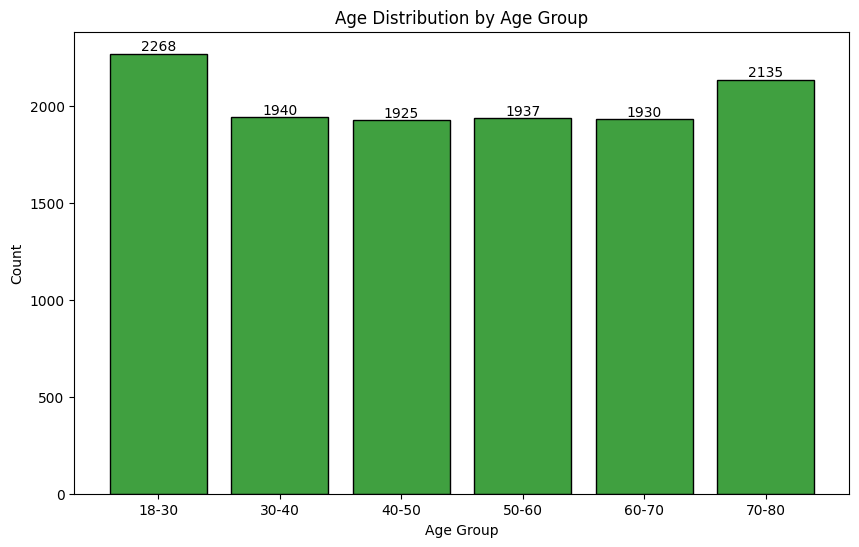

In [9]:
#Age Group distribution among unique customers
#Find Max age and min age then create age group
print(unique_customer_info['Age'].min())
print(unique_customer_info['Age'].max())
bins = [18, 30, 40, 50, 60, 70, 81]  
labels = ['18-30', '30-40', '40-50', '50-60', '60-70', '70-80']  
unique_customer_info['Age Group'] = pd.cut(unique_customer_info['Age'], bins=bins, labels=labels, right=False)

# Plot histogram for age groups
plt.figure(figsize=(10, 6))
ax2 = sns.histplot(unique_customer_info['Age Group'], color='green', shrink=0.8)
ax2.bar_label(ax2.containers[0])

plt.title('Age Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [10]:
#as the loytalty member status has changes over time and indicates whether the customer signed up or cancelled the memerbship over the period
#it'll be a good to have insight on the member retention

#sort by 'Customer ID' and 'Purchase Date'
df.sort_values(by=['Customer ID', 'Purchase Date'], inplace=True)

#get the first and last 'Loyalty Member' status for each customer
first_status = df.groupby('Customer ID')['Loyalty Member'].first()
last_status = df.groupby('Customer ID')['Loyalty Member'].last()

#create a DataFrame to compare first and last status
loyalty_summary = pd.DataFrame({'First Status': first_status, 'Last Status': last_status})

#identify the change type
loyalty_summary['Change Type'] = loyalty_summary.apply(lambda x: 'Signed Up' if x['First Status'] == 'No' and x['Last Status'] == 'Yes'
                                                       else ('Canceled' if x['First Status'] == 'Yes' and x['Last Status'] == 'No'
                                                             else 'No Change'), axis=1)

#count the number of unique customers for each change type
change_counts = loyalty_summary['Change Type'].value_counts().reset_index()
change_counts.columns = ['Change Type', 'Number of Unique Customers']

#display the summary
print(change_counts)

#Over 2023-2024, 963 customers cancelled their membership while 930 signed up for it

  Change Type  Number of Unique Customers
0   No Change                       10242
1    Canceled                         963
2   Signed Up                         930


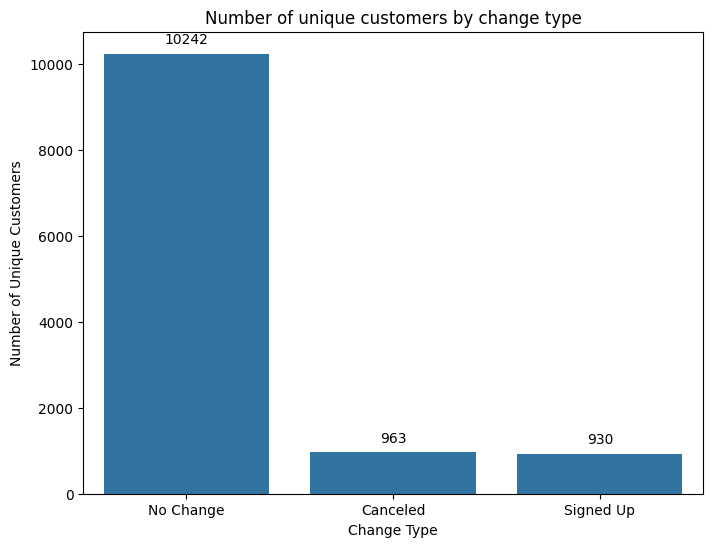

In [11]:
#better visuzalition using barplot to show the count differences across the different change types
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Change Type', y='Number of Unique Customers', data=change_counts)

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title('Number of unique customers by change type')
plt.xlabel('Change Type')
plt.ylabel('Number of Unique Customers')
plt.show()

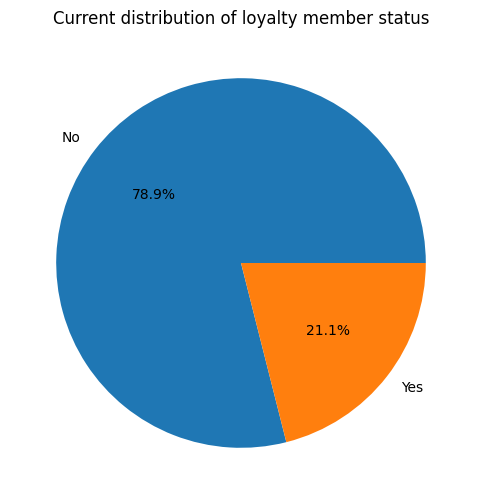

In [12]:
#calculate the CURRENT distribution of Loyalty Member based on the last status
loyalty = last_status.value_counts().reset_index()

#rename columns for better readability
loyalty.columns = ['Loyalty Member Status', 'Number of Unique Customers']

#pie chart for better visualization of the distribution with only two memembershio types
plt.figure(figsize=(8, 6))
plt.pie(loyalty['Number of Unique Customers'], labels=loyalty['Loyalty Member Status'], autopct='%1.1f%%')
plt.title('Current distribution of loyalty member status')
plt.show()


## Exploratory Data Analysis - Customer purchase behaviour, spendings and ratings

Text(0.5, 1.0, 'Total Purchase Sales')

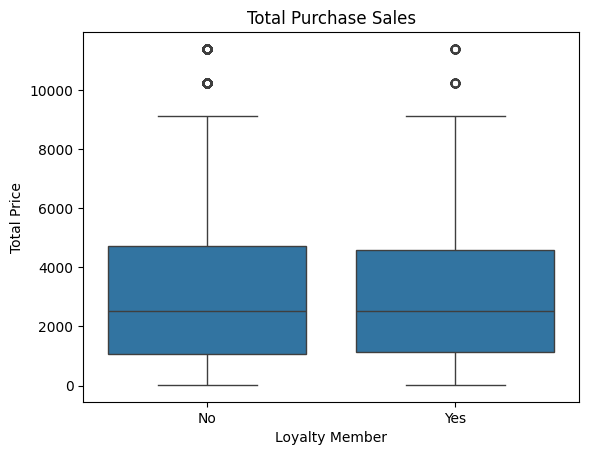

In [13]:
#Total Price distribution
sns.boxplot(x='Loyalty Member', y='Total Price', data=df)
plt.title('Total Purchase Sales')

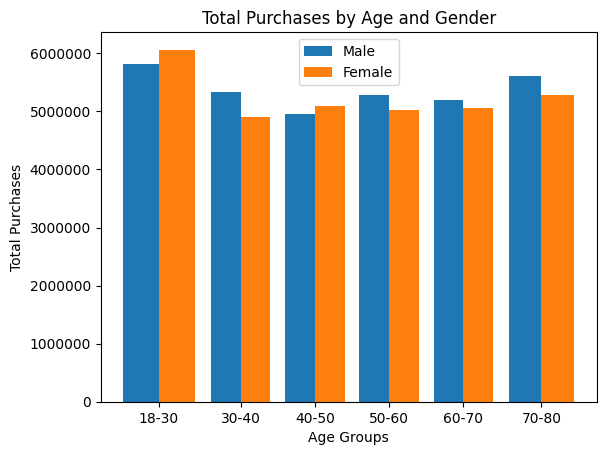

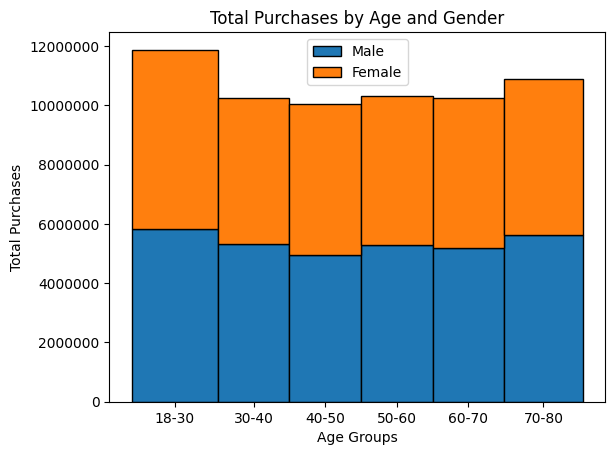

In [14]:
#Check the gender and Age total purchases distribution
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']
plt.hist([male_df['Age'], female_df['Age']], 
         bins=bins,
         weights=[male_df['Total Price'], female_df['Total Price']], 
         label=['Male', 'Female'])
plt.ticklabel_format(style='plain') 
plt.legend(['Male', 'Female'])
plt.xlabel('Age Groups')
plt.ylabel('Total Purchases')
plt.title('Total Purchases by Age and Gender')
plt.xticks(ticks=[(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)], labels=labels)  
plt.show()

#Use stacked bar chart to get further insight
plt.hist([male_df['Age'], female_df['Age']], 
         bins=bins,
         weights=[male_df['Total Price'], female_df['Total Price']], 
         label=['Male', 'Female'], stacked=True, edgecolor='black')
plt.ticklabel_format(style='plain')
plt.legend(['Male', 'Female'])
plt.xlabel('Age Groups')
plt.ylabel('Total Purchases')
plt.title('Total Purchases by Age and Gender')
plt.xticks(ticks=[(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)], labels=labels)  
plt.show()

In [15]:
#to find out the summary statistics of certain important metrics such as rating and sales performance
df['Rating'].describe()

count    19999.000000
mean         3.093905
std          1.223778
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Rating, dtype: float64

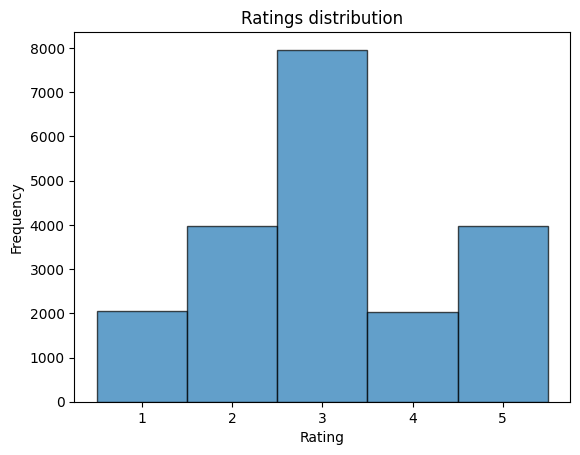

In [16]:
#create a histogram with adjusted bins to align with discrete ratings from the dataset
plt.hist(df['Rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black', alpha=0.7)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Ratings distribution')
plt.show()

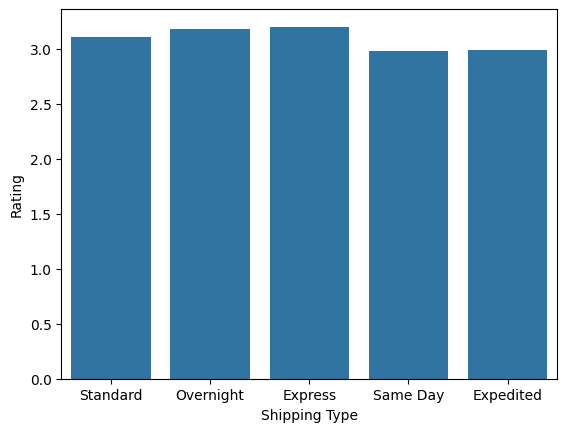

In [17]:
#find out whether certain shipping type has
sns.barplot(x='Shipping Type', y='Rating', data=df, errorbar=None)
plt.show()

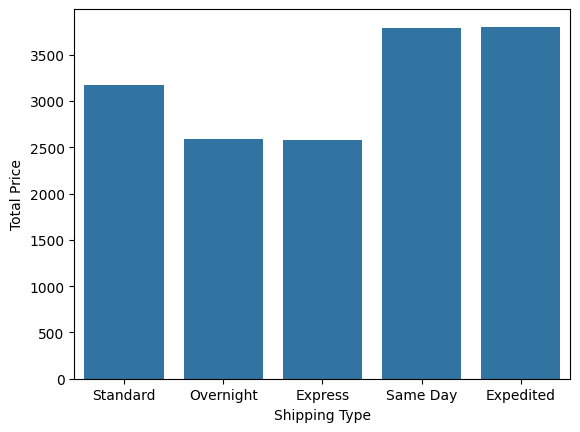

In [18]:
#find out whether certain shipping type has
sns.barplot(x='Shipping Type', y='Total Price', data=df, errorbar=None)
plt.show()

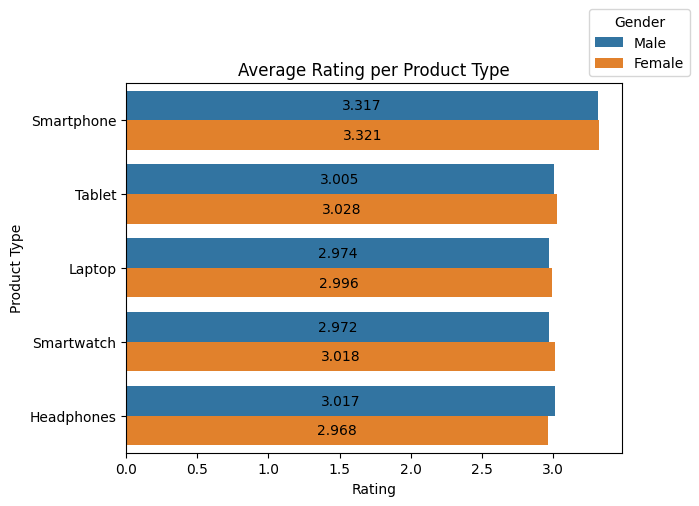

In [19]:
#Find out the average rating by product type and gender
ax = sns.barplot(y=df['Product Type'], x=df['Rating'], hue=df['Gender'], errorbar=None) 
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='center')  # Format to 3 decimal places
plt.title('Average Rating per Product Type')
plt.legend(title='Gender', loc='lower right', bbox_to_anchor=(1.15, 1))
plt.show()

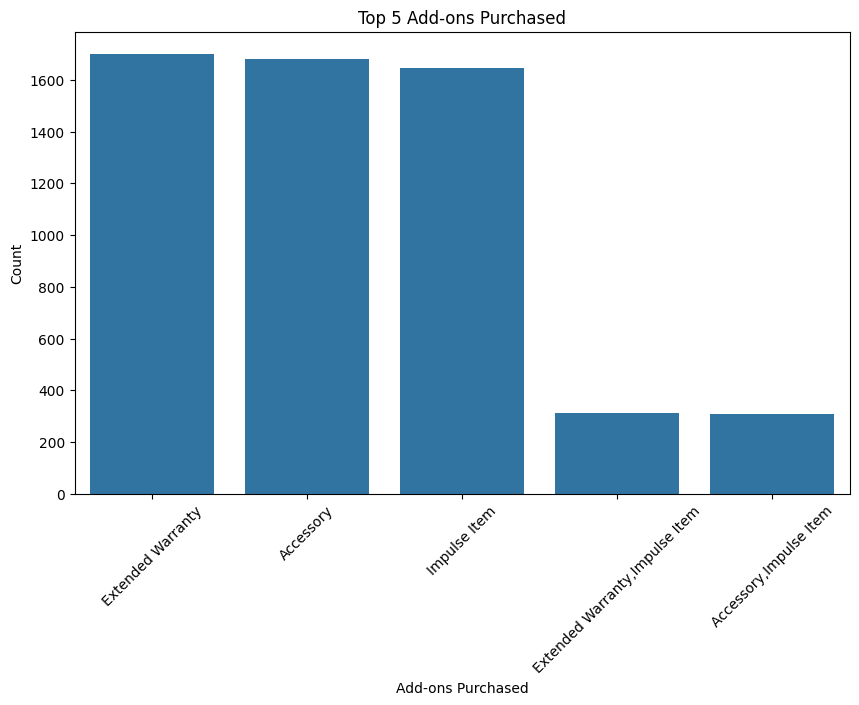

In [20]:
addon=df['Add-ons Purchased'].value_counts()
addon = addon[addon.index != 'None']
top5addon=addon.head(5)

#plot a bar chart showing the top 5 add-on purchases
plt.figure(figsize=(10, 6))
sns.barplot(x=top5addon.index, y=top5addon.values)

plt.xlabel('Add-ons Purchased')
plt.ylabel('Count')
plt.title('Top 5 Add-ons Purchased')
plt.xticks(rotation=45)
plt.show()

## Correlation analysis

In [21]:
#utilized Pearson's correlation to find out the correlations between all numeric features except for customer ID
numeric_df = df.select_dtypes(include=['number']).drop(columns=['Customer ID'])
corr_matrix=numeric_df.corr()
print(corr_matrix)

                   Age    Rating  Total Price  Unit Price  Quantity  \
Age           1.000000  0.002995     0.003036   -0.004384  0.008461   
Rating        0.002995  1.000000    -0.232401   -0.343845 -0.008530   
Total Price   0.003036 -0.232401     1.000000    0.673984  0.653851   
Unit Price   -0.004384 -0.343845     0.673984    1.000000  0.006739   
Quantity      0.008461 -0.008530     0.653851    0.006739  1.000000   
Add-on Total -0.005357 -0.044301     0.083876    0.125209  0.003336   

              Add-on Total  
Age              -0.005357  
Rating           -0.044301  
Total Price       0.083876  
Unit Price        0.125209  
Quantity          0.003336  
Add-on Total      1.000000  


<Axes: >

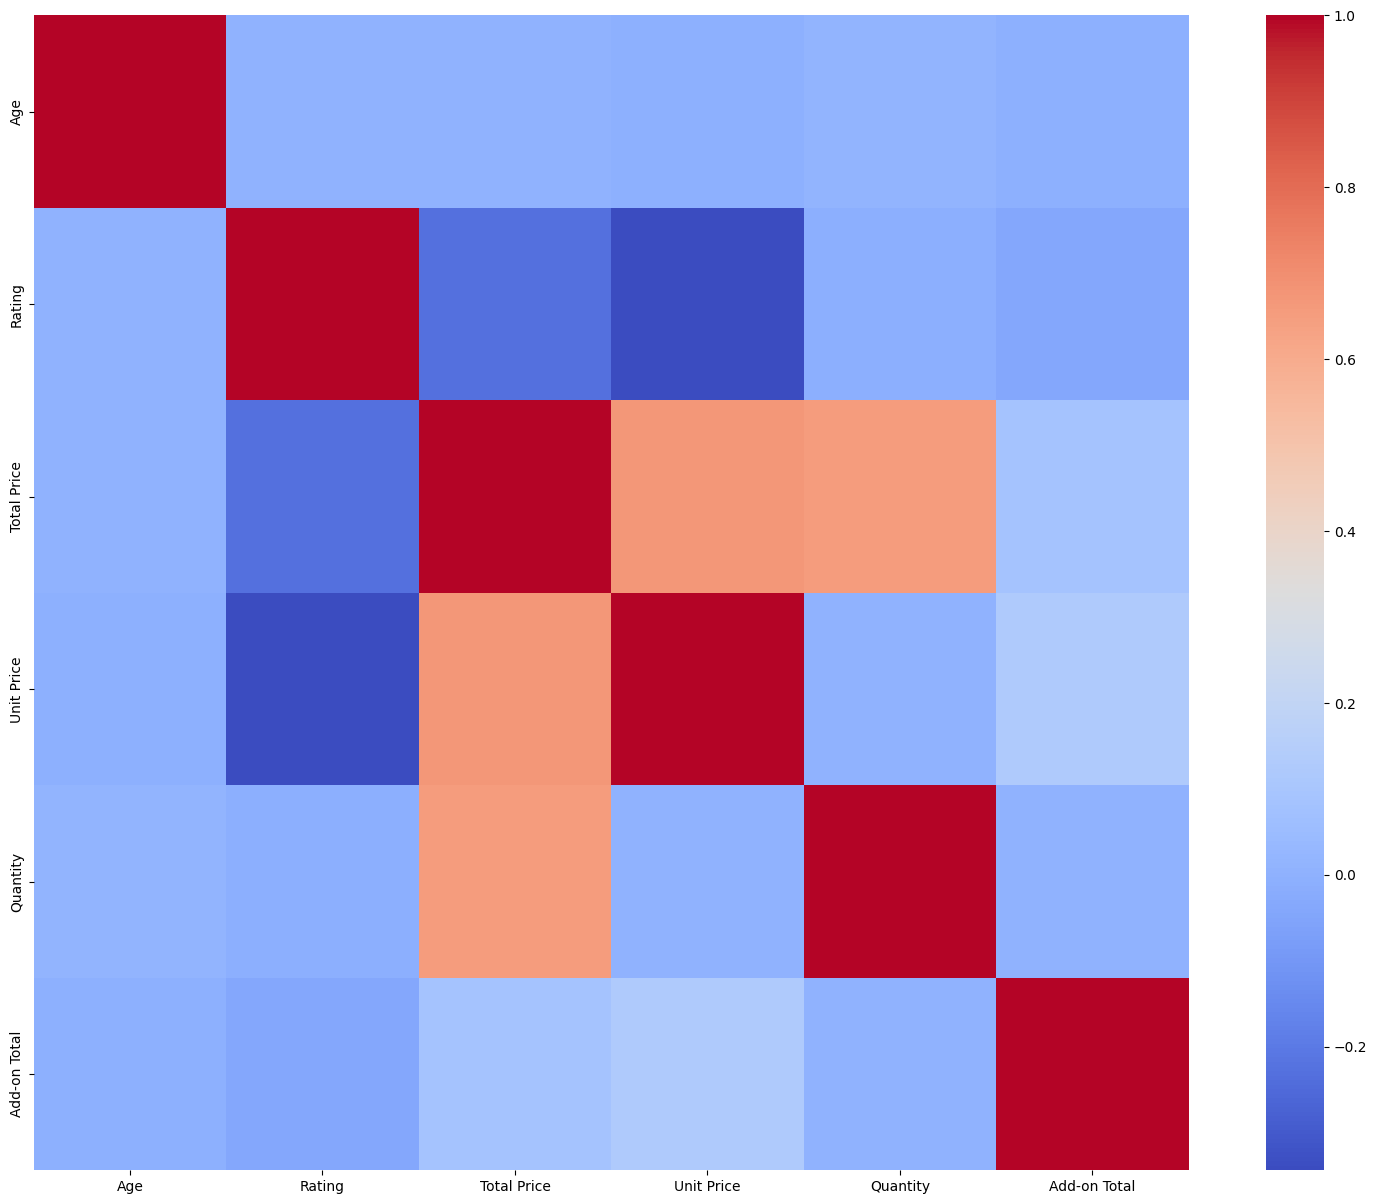

In [22]:
#to give a better visulization of the correlations of the numeric columns using heatmap indicating the level of correlation
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, square=True,cmap='coolwarm')

In [23]:
#the 3 features most correlated with the Rating
rating_corr = corr_matrix['Rating'].sort_values(ascending=True)
mostCorrelated = rating_corr.index[0:3]
mostCorrelated

#So the features most negatively correlated with Rating are 1) Unit Price 2) Total Price 3) Add-On Total

Index(['Unit Price', 'Total Price', 'Add-on Total'], dtype='object')

In [24]:
#for categorical variables, we want to use contingency tables to find out the relationship between 'Payment Method' and 'Order status'
# a brief EDA on both payment type and order status
payment=df['Payment Method'].unique()
print(payment)
#as Paypal have two different entries, hence we need to handle the data entry inconsistencies

#standardize the 'Payment Method' column by correcting the inconsistencies
df['Payment Method'] = df['Payment Method'].str.strip().str.capitalize()

#confirm that all entries are standardized
print(df['Payment Method'].value_counts())


['Credit Card' 'Paypal' 'Cash' 'Debit Card' 'Bank Transfer' 'PayPal']
Payment Method
Credit card      5868
Paypal           5798
Bank transfer    3370
Cash             2492
Debit card       2471
Name: count, dtype: int64


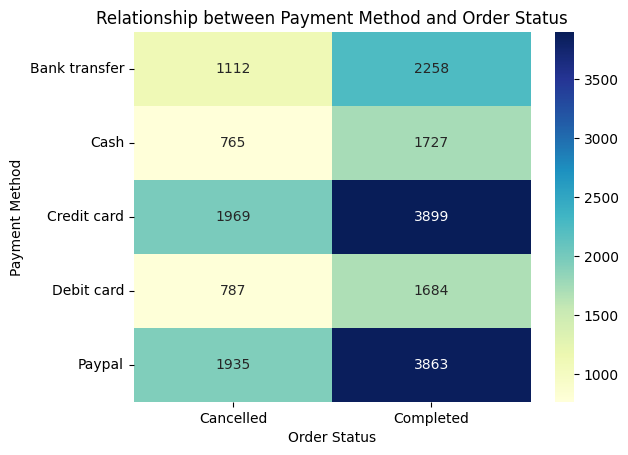

In [25]:
#for categorical variables, we used contingency tables to analyze the relationship between Payment Method and the Order Status
contingency_table = pd.crosstab(df['Payment Method'], df['Order Status'])

#create a heatmap to visualize the contingency table
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Relationship between Payment Method and Order Status')
plt.show()

#Paypal and Credit card are the most common payment methods among both completed and cancelled orders

## Hypothesis Testing

Loyalty Member
No     3.090886
Yes    3.104790
Name: Rating, dtype: float64
T-statistic: 0.6624352348798254, P-value: 0.5076999629946625
Cannot reject null hypothesis, loyalty program does not affect the rating


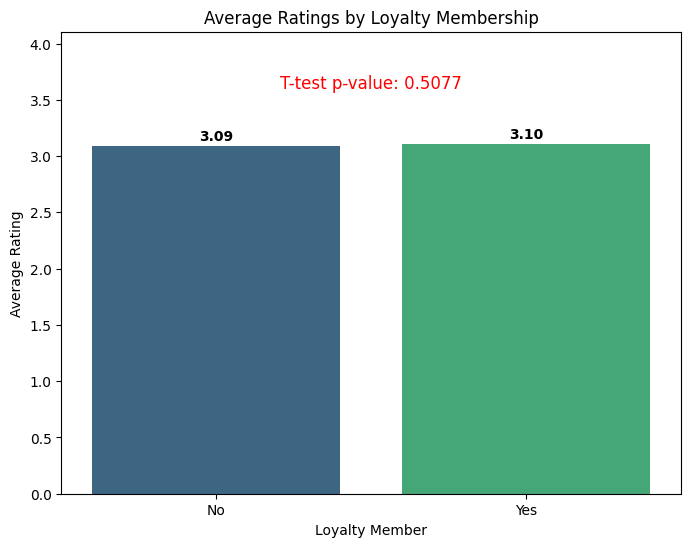

In [26]:
# Perform Hypothesis Test
average_ratings = df.groupby('Loyalty Member')['Rating'].mean()
print(average_ratings)

loyal_members = df[df['Loyalty Member'] == 'Yes']['Rating']
non_loyal_members = df[df['Loyalty Member'] == 'No']['Rating']

t_stat, p_value = stats.ttest_ind(loyal_members, non_loyal_members)
print(f"T-statistic: {t_stat}, P-value: {p_value}")
def hypothesis_test(p):
    if p<0.005:
        print("Reject null hypothesis, loyalty program does affect the rating")
    else:
        print("Cannot reject null hypothesis, loyalty program does not affect the rating")

hypothesis_test(p_value)

#Visualize the hypothesis test result
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=average_ratings.index, y=average_ratings.values, hue=average_ratings.index, palette='viridis')

#Add the number on the top of the bar
for index, value in enumerate(average_ratings.values):
    ax.text(index, value + 0.05, f'{value:.2f}', ha='center', fontweight='bold')

# Display p-value on the plot
plt.text(0.5, max(average_ratings.values) + 0.5, f'T-test p-value: {p_value:.4f}', 
         ha='center', fontsize=12, color='red')

# Customize the plot
plt.title('Average Ratings by Loyalty Membership')
plt.xlabel('Loyalty Member')
plt.ylabel('Average Rating')
plt.ylim(0, max(average_ratings.values) + 1)
plt.show()